In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit



%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans


In [5]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1024 parallax measurements

In [6]:
pxmax = .3
pxmin = 1.6
gx = np.linspace(pxmax, pxmin, 1000)

In [7]:
# s/n of detection
(0.5288)/0.4259

1.2416060108006575

In [8]:
# parallax distance measurement from pulsar timing
pxPTA = 0.85524949720672699275
pxPTAerr =  0.14638523179025333953

In [76]:
dx = np.linspace(200, 3500,1000)

In [77]:
# Gaia parallax
pxGDR2 = 0.5288
pxGDR2err = 0.4259

#LK corrected distance from PTAs
px1024 = dx
dist_px1024 = norm(1.08*1000, .28*1000)


In [78]:
area1024_pta = simps(dist_px1024.pdf(px1024), dx)

In [79]:
# Corrected Bailer-Jones distance estimate
bj_1024 = []
for r in dx:
    bj_1024.append(pOfR(r,0.5288, 0.4259,0.425767399303625))

In [80]:
#valGDR2 = []
valPTA = []

for xx in gx:
    #valGDR2.append(sp.stats.norm.pdf(xx, pxGDR2, pxGDR2err))
    valPTA.append(sp.stats.norm.pdf(xx, pxPTA, pxPTAerr))


In [81]:
#areaT = trapz(valR16, dx) # are curves really normalized to 1?
areaPTA = simps(valPTA, dx)
#areaSDR2 = simps(valGDR2, dx)
areaBJ = simps(bj_1024,dx)

In [82]:
#plt.plot(1/dist_BJ_1024*1000, bj_1024, label = "GAIA", color = "C5", linestyle='dashed')

areaBJ 

89.98058333913775

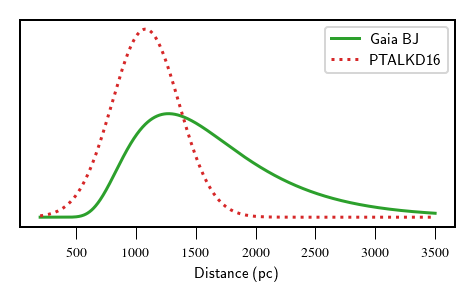

In [83]:
fig, ax1 = plt.subplots()
#plt.plot(dx, np.array(valGDR2)/areaSDR2, label = "Gaia", color = "C0", linestyle='dashed')
plt.plot(dx, np.array(bj_1024)/areaBJ , label = "Gaia BJ", color = "C2", linestyle='solid')
#plt.plot(dx, np.array(valPTA)/areaPTA, label = "PTA", color = "C1", linestyle='dashed')
plt.plot(dx, np.array(dist_px1024.pdf(px1024))/area1024_pta, label = r"PTALKD16", color = "C3", linestyle='dotted')


#plt.xlim(dx, 175)
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("normedDist_0437.pdf")

In [84]:
combo = np.array(valPTA)*np.array(dist_px1024.pdf(px1024))

In [85]:
normCombo = simps(combo, dx)

In [86]:
normCombo 


1.1390931445558568

In [87]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1024 = 386
eplus_DM_NE_1024 = 39
eminus_DM_NE_1024 = 38

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1024 = 382.3 # no errors reported here...

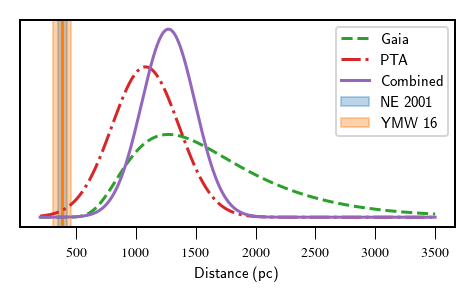

In [88]:
fig, ax1 = plt.subplots()
# DM NE 2001 model
ax1.axvspan(d_DM_NE_1024 - eminus_DM_NE_1024, d_DM_NE_1024+ eplus_DM_NE_1024, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1024, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1024*.8, d_DM_YMW_1024*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1024, ymin=0, ymax=1, color = "C1")

#plt.plot(1/gx*1000, np.array(valGDR2)/areaSDR2, label = "Gaia", color = "C0", linestyle='dashed')
plt.plot(dx, np.array(bj_1024)/areaBJ , label = "Gaia", color = "C2", linestyle='dashed')
plt.plot(dx, np.array(dist_px1024.pdf(px1024))/area1024_pta, label = "PTA", color = "C3", linestyle='-.')
plt.plot(dx, combo/normCombo  , label = "Combined", color = "C4", linestyle='solid')

plt.yticks([])
#plt.xlim(0,2800)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("combinedPDFs_1024wDM.pdf")

In [89]:
# log transform
new1024 = []
for ii in np.array(bj_1024)/areaBJ:
    new1024.append(10**(ii))

In [90]:
# the following code was modified from 
# https://github.com/Ffisegydd/python-examples/blob/master/examples/scipy/fitting%20a%20gaussian%20with%20scipy%20curve_fit.py

In [99]:
newx = (dx/1000)
newy = (combo/normCombo)
#newy =  new1024

In [100]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y

In [107]:
p_initial = [1.0, 1.2, 0.1, 0.0]

In [108]:
popt, pcov = curve_fit(gauss, newx, newy, p0=p_initial)

In [109]:
y_fit = gauss(newx, *popt)

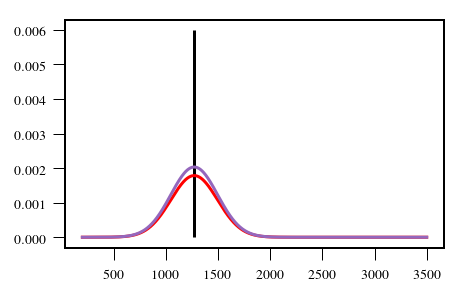

In [119]:
fig, ax = plt.subplots()
ax.plot(dx, y_fit, color = 'red')
plt.plot(dx, combo, label = "Combined", color = "C4", linestyle='solid')
plt.vlines(x=popt[1]*1000, ymin=0, ymax = 0.006)
#plt.ylim(0.0)

In [105]:
# mean distance from fit
popt[1]*1000

1271.7539352713763

In [106]:
# 1-sigma error on distance fit
popt[2]*1000

223.62246112844696

In [32]:
# mean distance from fit
popt[1]*1000

1413.9238096678346

In [33]:
# 1-sigma error on distance fit
popt[2]*1000

417.15307568439545